In [1141]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
# imports
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
set_config(display='diagram')

In [1142]:
Cust_seg = pd.read_csv(r'C:\Users\pedro\Desktop\Data Science\Advanced Machine Learning\TEST_folder\option_A_clustering_df - option_A_clustering_df.csv')
df = Cust_seg
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.184194,47.730389


# Exploracion y limpieza

In [1143]:
#Data Description
df.describe()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
count,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,...,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,6.643497e+05,1175.502832,51.758495,349.306837,26.994134,1935.205097,595.065939,334.273463,102.417071,170.282160,...,8.271238,148.908576,4.415858,3.375607,0.387743,0.628236,1.319579,1972.183455,-122.271891,47.572471
std,2.978080e+05,446.398643,174.464172,544.632918,115.331907,764.888792,567.175862,422.825946,187.119944,239.635895,...,37.449815,201.636086,18.643753,0.947061,0.506022,0.651598,0.609963,32.905503,0.086519,0.127187
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,-122.526073,47.213547
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1952.000000,-122.346573,47.488749
50%,6.305500e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1967.000000,-122.291976,47.576939
75%,7.886125e+05,1450.000000,0.000000,580.000000,0.000000,2360.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,257.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2016.000000,-122.192528,47.681099
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,620.000000,1940.000000,100.000000,8.000000,3.000000,4.000000,5.000000,2019.000000,-122.090088,47.777422


No se encuentran rangos de valores atipicos. 

In [1144]:
#Shape of the data set
df.shape

(4944, 22)

In [1145]:
#eliminado de filas duplicadas.
print('Duplicados:', df.duplicated().sum())
df= df.drop_duplicates()

Duplicados: 29


In [1146]:
print('Duplicados:', df.duplicated().sum())

Duplicados: 0


In [1147]:
#Identificando valores faltantes
df.isna().sum()

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64

In [1148]:
df.dtypes

SalePrice               int64
SqFt1stFloor            int64
SqFtHalfFloor           int64
SqFt2ndFloor            int64
SqFtUpperFloor          int64
SqFtTotLiving           int64
SqFtTotBasement         int64
SqFtFinBasement         int64
SqFtGarageBasement      int64
SqFtGarageAttached      int64
DaylightBasement        int64
SqFtOpenPorch           int64
SqFtEnclosedPorch       int64
SqFtDeck                int64
BrickStone              int64
Bedrooms                int64
BathHalfCount           int64
Bath3qtrCount           int64
BathFullCount           int64
YrBuilt                 int64
Longitude             float64
Latitude              float64
dtype: object

Como todos los datos son numericos no se buscaran inconsistencias

# Preparacion de los datos para el modelo

In [1149]:
# Selectors

num_selector = make_column_selector(dtype_include='number')
# Imputers

mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()

# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer,scaler)
# Categorical pipeline

## Not Needed for this Dataset

# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple)
preprocessor
# fit on train
preprocessor.fit(df) 
# transform train and test
df_processed = preprocessor.fit_transform(df)

In [1150]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(df_processed).sum().sum(), 'missing values df')
print('\n')
print('All data in df_processed are', df_processed.dtype)
print('shape of data is', df_processed.shape)
print('\n')
df_processed

0 missing values df


All data in df_processed are float64
shape of data is (4915, 22)




array([[-0.88610627,  0.92365571, -0.29726378, ..., -0.21076092,
         0.86973589, -1.85493217],
       [-0.63740172,  0.47409697, -0.29726378, ..., -0.82026927,
        -1.04391706, -0.49033145],
       [ 0.01140734, -0.38006464, -0.29726378, ...,  1.43491162,
         1.32890878, -1.05828013],
       ...,
       [-0.03196941,  0.29427347, -0.29726378, ...,  0.21589493,
         0.61594993,  1.24069337],
       [ 0.88915858,  0.27179553, -0.29726378, ..., -0.72884302,
        -1.28626142, -0.00966169],
       [ 1.84361466,  0.11444997, -0.29726378, ...,  1.28253454,
         1.87366359,  1.08296964]])

# Modelo KMeans

## Grafico de codo y Silueta

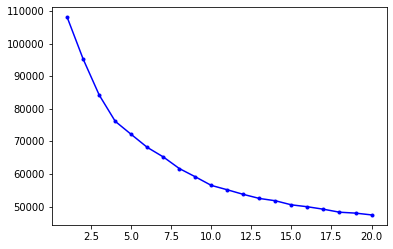

In [1151]:
# Visualize K elbow
X=df_processed
score = []
k_clusters = range(1,21)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
  
plt.plot(k_clusters, score,'b.-')

Se puede apreciar que el codo se encuentra en la posicion 4.0

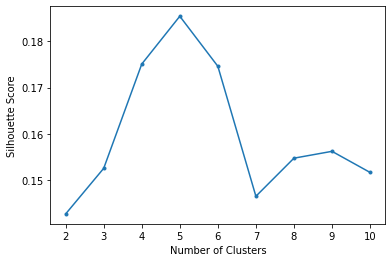

In [1207]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_processed)
  silhouette_scores.append(silhouette_score(df_processed, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

Se puede apreciar que la N cantidad de clusters que tuvo un mejor puntaje fue 5

## Seleccion de Cantidad de Clusters

In [1153]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 4)
kmeans3 = KMeans(n_clusters = 5)
kmeans2.fit(df_processed)
kmeans3.fit(df_processed)

KMeans(n_clusters=5)

In [1154]:
df_2=df
df_3=df
# Save the cluster labels to the dataframe 
df_2['cluster2'] = kmeans2.labels_
df_3['cluster3'] = kmeans3.labels_
# Visualize the clusters
import plotly.express as px


C:\Users\pedro\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pedro\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1155]:

import plotly.express as px
#Grafico 3d de 4 agrupaciones 
fig = px.scatter_3d(df, x='YrBuilt', y='SqFtTotLiving', z='SalePrice',
              color='cluster2',symbol='cluster2')
fig.show()
              

In [1156]:
#Grafico 3d de 5 agrupaciones 
fig = px.scatter_3d(df, x='YrBuilt', y='SqFtTotLiving', z='SalePrice',
              color='cluster3')
fig.show()

Se escogera el grupo de 4 porque visualmente se logra una mejor clasificacion. Los grupos se ven mas compactos y no se percibe que hayan grupos inteferiendo en otros conglomerados.

# Analisis y reporte de los Clusters

In [1157]:
#Se elimina Cluster 3 (5 agrupaciones)
df =df.drop(['cluster3'], axis=1)
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude,cluster2
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,220,0,6,0,2,1,1965,-122.196399,47.336118,2
1,474250,1390,0,0,0,2200,810,810,0,0,...,340,0,4,1,0,1,1945,-122.361913,47.509874,2
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,4,1,0,2,2019,-122.156684,47.437557,3
3,659000,660,0,540,0,1820,620,620,0,0,...,100,0,3,1,0,2,2016,-122.370252,47.565146,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,320,0,3,0,0,2,1967,-122.184194,47.730389,1


- Grafica de barras que muestra la media las columnas, consideradas significativas, de cada cluster.

In [1158]:
# Grouping the dataframe by cluster and aggregate by mean values
# Adding as_index=False so that the clusters are a column, not the index
cluster_groups = df.drop(['SqFt1stFloor','SqFtHalfFloor','SqFt2ndFloor','SqFtUpperFloor','SqFtTotBasement','SqFtFinBasement','Longitude','Latitude','DaylightBasement','SqFtOpenPorch','SqFtEnclosedPorch','SqFtDeck'], axis=1).groupby('cluster2', as_index=False).mean()
cluster_groups

,cluster2,SalePrice,SqFtTotLiving,SqFtGarageBasement,SqFtGarageAttached,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt
0,0,700286.604819,1537.291566,104.503614,10.322892,0.481928,2.753012,0.528916,0.903614,1.245783,2015.954217
1,1,535441.334704,1440.407712,28.699229,155.235476,4.946015,3.019023,0.213882,0.283805,1.093059,1947.292545
2,2,716037.064815,2334.504274,238.179487,135.510684,8.089031,3.804131,0.390313,0.945869,1.296296,1963.502849
3,3,867185.149457,2944.797554,35.336957,460.756793,0.618207,4.228261,0.683424,0.615489,2.050272,2003.372283


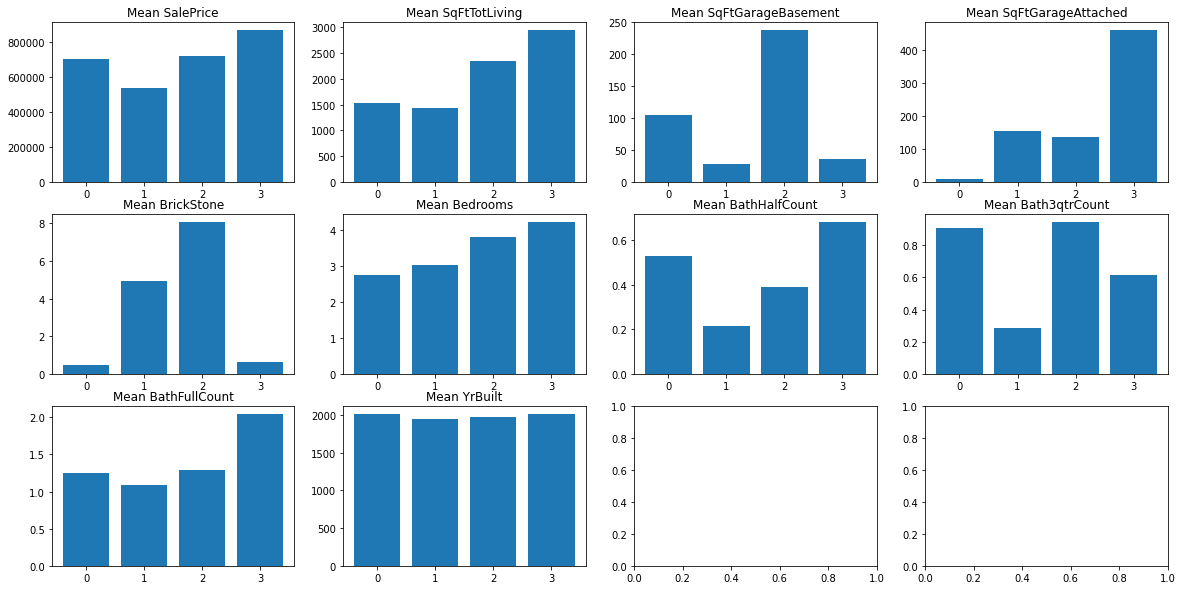

In [1159]:
values = ['0','1','2','3']
# Visualize means 
fig, axes = plt.subplots(3,4, figsize = (20, 10),  ) 
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster2'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}') 

- Composicion porcentual de cada cluster en el dataset.

In [1160]:
pie=df.groupby('cluster2').size().reset_index()
pie.columns=['cluster2','YrBuilt']
px.pie(pie,values='YrBuilt',names='cluster2',)

### Interpretacion de los datos

- Grupo #0

Este grupo de casas fueron construidas en promedio en el año 2000, posee la media de el precio de venta más costoso debido a ser el grupo con mayores m2 de espacio habitable en promedio. Además, un promedio de menos del 10% de las casas estan construidas en ladrillo. 

Este grupo de casas, poseen en promedio 4 habitaciones, 2 baños completos, 0.6 medio baño y 0.6 ¾ de baño. Ademas, tienen un sotano de menos de 50 m2 en promedio, siendo este el sotano mas pequeño al igual que el grupo 3 y un garaje agregado de poco más de 400 m2 en promedio, por lo que tiene un espacio de garaje mayor a los demás grupos. Este grupo compone un 16.9% del dataset.

- Grupo #1

Es el segundo grupo de casas con mayor valor de la media de el precio de venta, el cual ronda aproximadamente por los 700,000 dólares. Este grupo de casas fueron construidas en promedio poco antes del año 2000, donde un promedio de el 80% de las casas estan construidas en ladrillo. 

Tienen en promedio poco menos de 2,500 m2 de espacio habitable con un amplio sotano de casi 250 m2 promediado entre todas las casas del grupo, siendo este el grupo con el promedio de m2 mayor de sotano. Ademas, cuenta con un garaje añadido de mas de 100 m2 igual al grupo #3. Dentro poseen un promedio de 3 a 4 habitaciones, con una media de 1.5 baños completos, 0.4 medio baño y más de 0.8 ¾ de baño. Este grupo compone un 15% del dataset, siendo el que menor participacion tiene en este conjunto de datos.

- Grupo #2

Grupo de casas construidos en promedio por el año 2000 al igual que el grupo #0, con una media de 1,500 m2 de espacio habitable y 100 metros de sotano en promedio. Aproximadamente un 10% de las casas de este grupo estan construidas en ladrillo. Las casas dentro de este grupo tienen un valor promediado de precio de venta cercano al valor del grupo #1 de casas, el cual ronda por los 700,000 en promedio. A diferencia de los demás grupos de casas, este solo tiene añadido m2 insignificantes de garaje en promedio.

Cuenta en promedio con más de 2 habitaciones. Sin embargo al promediar la disponibilidad de baños, este cuenta con más disponibilidad que en el grupo de casas #1 ya que tiene en promedio 1.5 baños completos igual que dicho grupo pero 0.5 medio baño y poco más de 0.8 ¾ de baño. Este grupo compone un 39.6% del dataset, siendo el que mayor ocupacion tiene en el mismo.

- Grupo 3

Al igual que el grupo #2, estas casas fueron construidas en promedio poco antes de los años 2000 donde en promedio el 50% de estas casas fueron construidas en ladrillo. Es el grupo de casas con menor valor de la media en el precio de venta, debido a que cuenta con un promedio de 1,500 m2 de espacio habitable, 3 habitaciones, 1 baño completo, 0.2 medio baño y 0.2 ¾ de baño estos valores siendo la media de todas las casas dentro del grupo.

Tiene un espacio de sotano en promedio menor a los 50 m2. Y un garaje de aproximadamente 150 m2.Por otro lado, Este grupo compone un 28.6% del dataset.

# Modeling

The house flipping company has provided new data about when the homes were sold and what businesses are nearby.  This new data has created a very large number of columns as the businesses, months sold, and years sold are all one-hot encoded.  

They would like you to use this new dataset to create a deep learning model that predicts the likely sale price for a new home coming to market.

Note: SalePrice is your target variable

## Verificacion de limpieza

In [1161]:

dfmodeling = pd.read_csv(r'C:\Users\pedro\Desktop\Data Science\Advanced Machine Learning\TEST_folder\option_A_modeling_df - option_A_modeling_df.csv')
dfmodeling.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0


In [1162]:
dfmodeling.shape

(4937, 171)

In [1163]:
#eliminado de filas duplicadas.
print('Duplicados:', dfmodeling.duplicated().sum())
dfmodeling=dfmodeling.drop_duplicates()

Duplicados: 0


In [1164]:
#Identificando valores faltantes
df.isna().sum()

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
cluster2              0
dtype: int64

## Realizar una división train-test en tus datos

In [1165]:
# Division
X = dfmodeling.drop(['SalePrice'], axis=1)
y = dfmodeling['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1166]:
#Selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
#Escaladores
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
# Tuples para Column Transformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
#Transform
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
#Fit
col_transformer.fit(X_train)
# transform train and test
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [1167]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (3702, 170)




array([[-0.08144003, -0.29435159, -0.63189667, ..., -0.52922867,
        -0.60502203, -0.13679241],
       [-0.57624064, -0.29435159, -0.63189667, ..., -0.52922867,
         1.65283237, -0.13679241],
       [ 0.16596027,  1.35093386, -0.63189667, ..., -0.52922867,
        -0.60502203, -0.13679241],
       ...,
       [-0.48627689,  1.86153969, -0.63189667, ...,  1.88954237,
        -0.60502203, -0.13679241],
       [ 0.25592402, -0.29435159, -0.63189667, ..., -0.52922867,
         1.65283237, -0.13679241],
       [-0.48627689, -0.29435159, -0.63189667, ..., -0.52922867,
        -0.60502203, -0.13679241]])

## PCA

In [1168]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)
print(pca.components_.shape)
print("El número de componentes es", pca.n_components_, "de", pca.n_features_)

(143, 170)
El número de componentes es 143 de 170


In [1169]:
print('shape of data before PCA is', X_train_processed.shape)
print("shape of data after PCA is", X_train_pca.shape)

shape of data before PCA is (3702, 170)
shape of data after PCA is (3702, 143)


Nota: Modelo no posee LEAKED DATA, se verifico realizar el PCA a los datos de X procesados, los cuales no poseen la columna a predecir. Tampoco se le ha agregado informacion al data set.

## Deep Learning model

In [1170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1171]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_pca.shape[1]
input_shape

143

In [1172]:
# Sequential model
model = Sequential()

### MODEL 1

Modelo sencillo, solo se le agrego Early Stopping.

In [1173]:
# First hidden layer
model.add(Dense(143, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
#  hidden layer
model.add(Dense(100, 
                activation = 'relu'))
#  hidden layer
model.add(Dense(25, 
                activation = 'relu')) 

In [1174]:
# Output layer
model.add(Dense(1, activation = 'linear'))

In [1175]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_322 (Dense)            (None, 143)               20592     
_________________________________________________________________
dense_323 (Dense)            (None, 100)               14400     
_________________________________________________________________
dense_324 (Dense)            (None, 25)                2525      
_________________________________________________________________
dense_325 (Dense)            (None, 1)                 26        
Total params: 37,543
Trainable params: 37,543
Non-trainable params: 0
_________________________________________________________________


In [1176]:
# Step 2: Compile
model.compile(loss = "mean_squared_error", optimizer = 'adam', metrics='mse')

In [1177]:
from tensorflow.keras.callbacks import EarlyStopping

In [1178]:
early_stopping = EarlyStopping(patience = 5)

In [1179]:
# Step 3: Fit our model
history = model.fit(X_train_pca, y_train,
                    validation_data = (X_test_pca, y_test), 
                    epochs=430,
                    callbacks = [early_stopping])

Epoch 1/430
116/116 [==============================] - 0s 1ms/step - loss: 531463143424.0000 - mse: 531463143424.0000 - val_loss: 524978880512.0000 - val_mse: 524978880512.0000
Epoch 2/430
116/116 [==============================] - 0s 870us/step - loss: 524562333696.0000 - mse: 524562333696.0000 - val_loss: 507242053632.0000 - val_mse: 507242053632.0000
Epoch 3/430
116/116 [==============================] - 0s 856us/step - loss: 480379207680.0000 - mse: 480379207680.0000 - val_loss: 428041076736.0000 - val_mse: 428041076736.0000
Epoch 4/430
116/116 [==============================] - 0s 847us/step - loss: 349465083904.0000 - mse: 349465083904.0000 - val_loss: 257831845888.0000 - val_mse: 257831845888.0000
Epoch 5/430
116/116 [==============================] - 0s 868us/step - loss: 169025765376.0000 - mse: 169025765376.0000 - val_loss: 110628446208.0000 - val_mse: 110628446208.0000
Epoch 6/430
116/116 [==============================] - 0s 893us/step - loss: 73685131264.0000 - mse: 736851

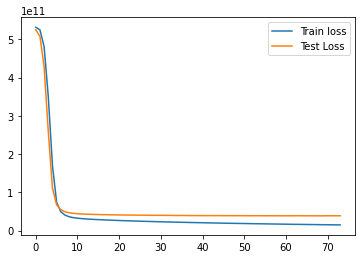

In [1180]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

### Model 2

En esta version se agrego un dropout en la primera capa para evitar mas sobre ajustes. 

In [1181]:
from tensorflow.keras.layers import Dense, Dropout

In [1182]:
# Sequential model
model2 = Sequential()

In [1183]:
# First hidden layer
model2.add(Dense(143, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model2.add(Dropout(.2))                
#  hidden layer
model2.add(Dense(100, 
                activation = 'relu'))

#  hidden layer
model2.add(Dense(25, 
                activation = 'relu')) 


In [1184]:
# Output layer
model2.add(Dense(1, activation = 'linear'))

In [1185]:
model2.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_326 (Dense)            (None, 143)               20592     
_________________________________________________________________
dropout_56 (Dropout)         (None, 143)               0         
_________________________________________________________________
dense_327 (Dense)            (None, 100)               14400     
_________________________________________________________________
dense_328 (Dense)            (None, 25)                2525      
_________________________________________________________________
dense_329 (Dense)            (None, 1)                 26        
Total params: 37,543
Trainable params: 37,543
Non-trainable params: 0
_________________________________________________________________


In [1186]:
# Step 2: Compile
model2.compile(loss = "mean_squared_error", optimizer = 'adam', metrics='mse')

In [1187]:
# Step 3: Fit our model
history2 = model2.fit(X_train_pca, y_train,
                    validation_data = (X_test_pca, y_test), 
                    epochs=430,
                    callbacks = [early_stopping])

Epoch 1/430
116/116 [==============================] - 0s 2ms/step - loss: 531439616000.0000 - mse: 531439616000.0000 - val_loss: 524794560512.0000 - val_mse: 524794560512.0000
Epoch 2/430
116/116 [==============================] - 0s 999us/step - loss: 522756227072.0000 - mse: 522756227072.0000 - val_loss: 501878980608.0000 - val_mse: 501878980608.0000
Epoch 3/430
116/116 [==============================] - 0s 989us/step - loss: 464734126080.0000 - mse: 464734126080.0000 - val_loss: 398655291392.0000 - val_mse: 398655291392.0000
Epoch 4/430
116/116 [==============================] - 0s 998us/step - loss: 306985533440.0000 - mse: 306985533440.0000 - val_loss: 207387312128.0000 - val_mse: 207387312128.0000
Epoch 5/430
116/116 [==============================] - 0s 994us/step - loss: 131745423360.0000 - mse: 131745423360.0000 - val_loss: 88335867904.0000 - val_mse: 88335867904.0000
Epoch 6/430
116/116 [==============================] - 0s 1ms/step - loss: 64589254656.0000 - mse: 6458925465

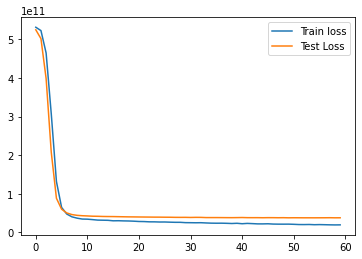

In [1188]:
# Visualize the loss
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.legend();

### Model 3

Se agregara otro drop out. Tambien se redujo que tan rapido se iba a producir el Early Stopping, de 5 epochs, despues de producir el mismo resultado, a 2 epochs. Se redujeron las cantidades de neuronas. Todo esto para reducir la varianza.

In [1189]:
# Sequential model
model3 = Sequential()

In [1190]:
early_stopping1 = EarlyStopping(patience = 2)

In [1191]:
# First hidden layer
model3.add(Dense(143, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model3.add(Dropout(.2))                
#  hidden layer
model3.add(Dense(50, 
                activation = 'relu',
                ))
model3.add(Dropout(.2))
#  hidden layer
model3.add(Dense(25, 
                activation = 'relu',
                ))



In [1192]:
# Output layer
model3.add(Dense(1, activation = 'linear'))

In [1193]:
model3.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_330 (Dense)            (None, 143)               20592     
_________________________________________________________________
dropout_57 (Dropout)         (None, 143)               0         
_________________________________________________________________
dense_331 (Dense)            (None, 50)                7200      
_________________________________________________________________
dropout_58 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_332 (Dense)            (None, 25)                1275      
_________________________________________________________________
dense_333 (Dense)            (None, 1)                 26        
Total params: 29,093
Trainable params: 29,093
Non-trainable params: 0
_________________________________________________

In [1194]:
# Step 2: Compile
model3.compile(loss = "mean_squared_error", optimizer = 'adam', metrics='mse')

In [1195]:
# Step 3: Fit our model
history3 = model3.fit(X_train_pca, y_train,
                    validation_data = (X_test_pca, y_test), 
                    epochs=430,
                    callbacks = [early_stopping1])

Epoch 1/430
116/116 [==============================] - 0s 2ms/step - loss: 531523207168.0000 - mse: 531523207168.0000 - val_loss: 525234995200.0000 - val_mse: 525234995200.0000
Epoch 2/430
116/116 [==============================] - 0s 1ms/step - loss: 526057865216.0000 - mse: 526057865216.0000 - val_loss: 511039799296.0000 - val_mse: 511039799296.0000
Epoch 3/430
116/116 [==============================] - 0s 999us/step - loss: 489864658944.0000 - mse: 489864658944.0000 - val_loss: 445298573312.0000 - val_mse: 445298573312.0000
Epoch 4/430
116/116 [==============================] - 0s 998us/step - loss: 378558676992.0000 - mse: 378558676992.0000 - val_loss: 296304967680.0000 - val_mse: 296304967680.0000
Epoch 5/430
116/116 [==============================] - 0s 996us/step - loss: 209562697728.0000 - mse: 209562697728.0000 - val_loss: 138197712896.0000 - val_mse: 138197712896.0000
Epoch 6/430
116/116 [==============================] - 0s 1ms/step - loss: 93924990976.0000 - mse: 9392499097

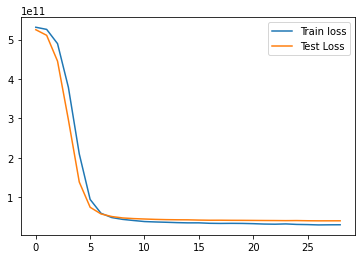

In [1196]:
# Visualize the loss
plt.plot(history3.history['loss'], label='Train loss')
plt.plot(history3.history['val_loss'], label='Test Loss')
plt.legend();

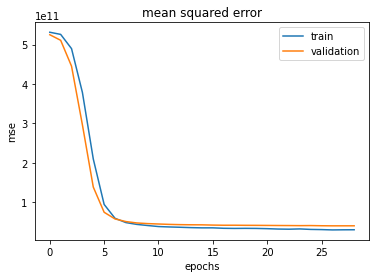

In [1197]:
plt.plot(history3.history['mse'])
plt.plot(history3.history['val_mse'])
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend( ['train','validation'] , loc = 'upper right')
plt.show()

## Evaluacion y seleccion del modelo.

In [1199]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 
from math import sqrt

In [1200]:
#Model 1
print('Model 1 MAE SCORE')
pred_train= model.predict(X_train_pca)
print('Model 1 MAE train score is', np.sqrt(mean_absolute_error(y_train,pred_train)))

pred= model.predict(X_test_pca)
print('Model 1 MAE test score is', np.sqrt(mean_absolute_error(y_test,pred))) 

#Model 2
print('Model 2 MAE SCORE')
pred_train= model2.predict(X_train_pca)
print('Model 2 MAE train score is', np.sqrt(mean_absolute_error(y_train,pred_train)))

pred= model2.predict(X_test_pca)
print('Model 2 MAE test score is', np.sqrt(mean_absolute_error(y_test,pred))) 

#Model 3
print('Model 3 MAE SCORE')
pred_train= model3.predict(X_train_pca)
print('Model 3 MAE train score is', np.sqrt(mean_absolute_error(y_train,pred_train)))

pred= model3.predict(X_test_pca)
print('Model 3 MAE test score is', np.sqrt(mean_absolute_error(y_test,pred))) 

Model 1 MAE SCORE
Model 1 MAE train score is 288.6314151750853
Model 1 MAE test score is 370.03488956645356
Model 2 MAE SCORE
Model 2 MAE train score is 299.3276092994399
Model 2 MAE test score is 367.6912587396422
Model 3 MAE SCORE
Model 3 MAE train score is 329.15211031027053
Model 3 MAE test score is 371.12125228047876


In [1204]:
#Model 1
print('Model 1 r2_score SCORE')
pred_train= model.predict(X_train_pca)
print('Model 1 r2_score train score is', np.sqrt(r2_score(y_train,pred_train)))

pred= model.predict(X_test_pca)
print('Model 1 r2_score test score is', np.sqrt(r2_score(y_test,pred))) 

#Model 2
print('Model 2 r2_score SCORE')
pred_train= model2.predict(X_train_pca)
print('Model 2 r2_score train score is', np.sqrt(r2_score(y_train,pred_train)))

pred= model2.predict(X_test_pca)
print('Model 2 r2_score test score is', np.sqrt(r2_score(y_test,pred))) 

#Model 3
print('Model 3 r2_score SCORE')
pred_train= model3.predict(X_train_pca)
print('Model 3 r2_score train score is', np.sqrt(r2_score(y_train,pred_train)))

pred= model3.predict(X_test_pca)
print('Model 3 r2_score test score is', np.sqrt(r2_score(y_test,pred))) 

Model 1 r2_score SCORE
Model 1 r2_score train score is 0.918057663913631
Model 1 r2_score test score is 0.7474751023390718
Model 2 r2_score SCORE
Model 2 r2_score train score is 0.9026401698381435
Model 2 r2_score test score is 0.7541923959274558
Model 3 r2_score SCORE
Model 3 r2_score train score is 0.8524853492578762
Model 3 r2_score test score is 0.7392464405921862


#### Seleccion

Se modifico el modelo  de varias formas para tratar de, visualmente reducir la varianza y el sesgo que pudiera tener el mismo, pero, como se puede apreciar en las evaluaciones de R2 y el MAE, a medida que el modelo se iba ajustado su puntuacion y su efectividad se veian comprometidas. Al final se logro encontrar un balance y por eso el modelo que mejor puntuacion tuvo fue el Modelo 2. 

In [1205]:
#Model 2
print('Model 2 r2_score SCORE')
pred_train= model2.predict(X_train_pca)
print('Model 2 r2_score train score is', np.sqrt(r2_score(y_train,pred_train)))

pred= model2.predict(X_test_pca)
print('Model 2 r2_score test score is', np.sqrt(r2_score(y_test,pred))) 
#Model 2
print('Model 2 MAE SCORE')
pred_train= model2.predict(X_train_pca)
print('Model 2 MAE train score is', np.sqrt(mean_absolute_error(y_train,pred_train)))

pred= model2.predict(X_test_pca)
print('Model 2 MAE test score is', np.sqrt(mean_absolute_error(y_test,pred))) 



Model 2 r2_score SCORE
Model 2 r2_score train score is 0.9026401698381435
Model 2 r2_score test score is 0.7541923959274558
Model 2 MAE SCORE
Model 2 MAE train score is 299.3276092994399
Model 2 MAE test score is 367.6912587396422


Este modelo fue el que menor error absoluto medio arrojo. Esto quiere decir que el margen de error entre la prediccion y la prueba promedio de todos los datos fue baja en comparacion con los demas modelos. Mientras menos error haya entre los datos el modelo sera mas exacto.

Por otro lado este modelo fue el que mayor R2 score arrojo, esto nos indica la solidez del mismo. Nos dice que el modelo tuvo una varianza de la variable dependiente (La variable con la que se esta comparando) de un 75.40%

Cabe destacar que el modelo esta sobre ajustado, y el resultado que menor sobre ajuste arrojo fue el del modelo 3, no obstante, aunque las modificaciones hayan servido para esto, no arrojaron mayor resultado en las metricas que se realizaron a los conjuntos de prueba. Por lo que se considera mas efectivo el modelo 2.